In [ ]:
import pandas as pd

# Data Collection

In [507]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Data Preprocessing

In [509]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [510]:
df.duplicated().any()

np.False_

In [511]:
df.shape

(545, 13)

In [512]:
import matplotlib.pyplot as plt

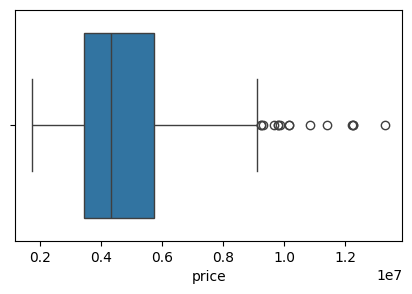

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.show()

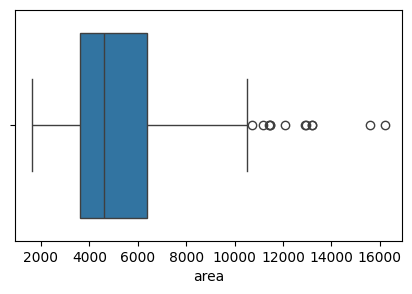

In [514]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['area'])
plt.show()

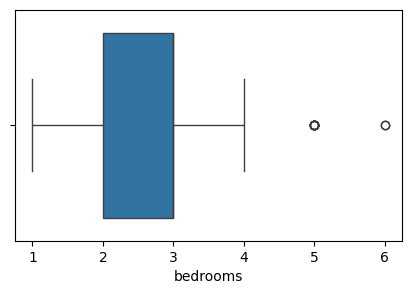

In [515]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['bedrooms'])
plt.show()

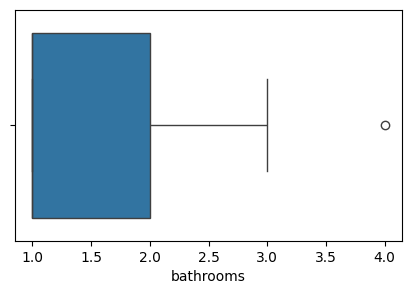

In [516]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['bathrooms'])
plt.show()

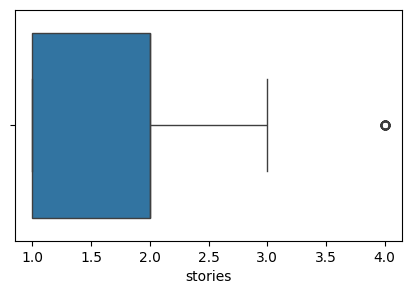

In [517]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['stories'])
plt.show()

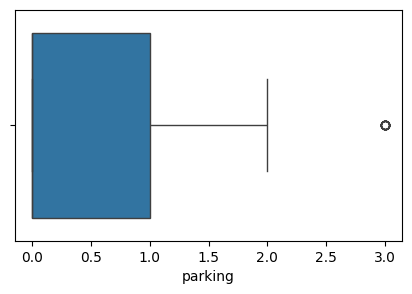

In [518]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['parking'])
plt.show()

In [519]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

df = df[(df['price'] > lb) & (df['price'] < ub)]
df.shape

(530, 13)

In [520]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)

IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

df = df[(df['area'] > lb) & (df['area'] < ub)]
df.shape

(517, 13)

In [521]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)

IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

df = df[(df['bedrooms'] > lb) & (df['bedrooms'] < ub)]
df.shape

(506, 13)

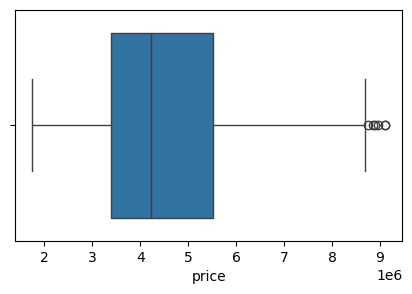

In [522]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.show()

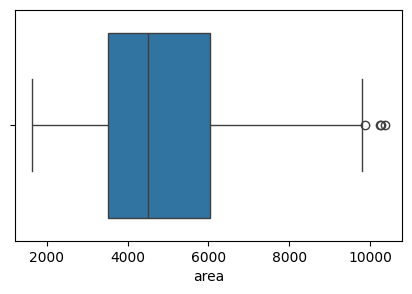

In [523]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['area'])
plt.show()

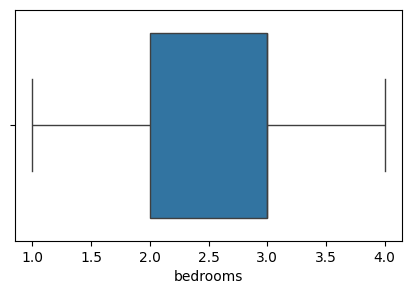

In [524]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['bedrooms'])
plt.show()

In [525]:
for col in df.columns:
    print(repr(col))

'price'
'area'
'bedrooms'
'bathrooms'
'stories'
'mainroad'
'guestroom'
'basement'
'hotwaterheating'
'airconditioning'
'parking'
'prefarea'
'furnishingstatus'


In [526]:
binary_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

for col in binary_cols:
    df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})

In [527]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


# Data Splitting

In [528]:
df = pd.get_dummies(df, drop_first=True)


In [529]:
X = df.drop('price', axis=1)
y = df['price']

# Train Test Split

In [530]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": root_mean_squared_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE,R2
Linear Regression,745979.147491,9.533455e+05,0.698143
Decision Tree,964186.862745,1.422877e+06,0.327587
Random Forest,781289.237745,1.051442e+06,0.632826


In [532]:
best_model = models["Linear Regression"]

final_preds = best_model.predict(X_test)

print(mean_absolute_error(y_test, final_preds))

745979.1474907276


In [533]:
print(root_mean_squared_error(y_test, final_preds))

953345.506938983


In [534]:
print(r2_score(y_test, final_preds))

0.698142591237962


# Model Saving

In [535]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(best_model, f)